In [1]:
%pylab nbagg
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

# Set working directory (adjust if needed)
#os.chdir("/Users/giovanni/Documents/GitHub/fufo/notebook/Psychedelic_proj/2025_LisaLuan/notebooks")

sys.path.append(os.path.abspath("../src"))
from functions_figs import *

file_path = '../data/SEEG/df_correlations_5MOIs_ieeg.csv'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# # Load dataset
df = pd.read_csv(file_path)

# Define a mapping from M_i to actual metric names
metric_names = {
    "M_13": "Salience",
    "M_14": "Peak Synchrony",
    "M_76": "Entrainment",
    "M_29": "Fluidity",
    "M_119": "Complexity"
}

# Apply the mapping to replace metric codes with names
df["Pre_Metric"] = df["Pre_Metric"].map(metric_names)
df["Post_Metric"] = df["Post_Metric"].map(metric_names)

# Filter dataset for the selected pre/post metric pair and radius = 100
df_filtered = df[(df["Pre_Metric"] == "Entrainment") & 
                 (df["Post_Metric"] == "Entrainment") & 
                 (df["Radius"] == 100)]

# Find the most anticorrelated session and subject (minimum correlation)
most_anticorrelated = df_filtered.loc[df_filtered["Correlation"].idxmin()]

# Display results
print(f"Most anticorrelated subject: {most_anticorrelated['Patient']}")
print(f"Most anticorrelated session: {most_anticorrelated['Session']}")
print(f"Correlation value: {most_anticorrelated['Correlation']:.3f}")

Most anticorrelated subject: P15
Most anticorrelated session: S16
Correlation value: -0.328


In [3]:
df_filtered

,Patient,Session,Radius,Pre_Metric,Post_Metric,Correlation,Significance,p-values,Network,ROI Name,ROI Label,Clustering Coefficient,Degree,Betweenness Centrality
268,P1,S1,100,Entrainment,Entrainment,0.602251,1,0.000000,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
543,P1,S2,100,Entrainment,Entrainment,0.356285,0,0.069307,SalVentAttn,7Networks_LH_SomMot_5,19,0.000955,7994,0.008632
818,P1,S3,100,Entrainment,Entrainment,0.075365,0,0.376238,SalVentAttn,7Networks_LH_SomMot_5,19,0.000955,7994,0.008632
1093,P1,S4,100,Entrainment,Entrainment,0.521201,1,0.000000,SalVentAttn,7Networks_LH_SomMot_3,17,0.001135,7249,0.006102
1368,P1,S5,100,Entrainment,Entrainment,-0.022139,0,0.544554,SalVentAttn,7Networks_LH_SomMot_2,16,0.001729,24179,0.004097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86343,P36,S7,100,Entrainment,Entrainment,-0.253571,0,0.851485,Vis,7Networks_RH_Vis_10,110,0.002035,15242,0.005811
86618,P36,S8,100,Entrainment,Entrainment,0.389286,0,0.113861,DorsAttn,7Networks_RH_Vis_9,109,0.003180,43884,0.004766
86893,P36,S9,100,Entrainment,Entrainment,0.657143,1,0.000000,DorsAttn,7Networks_RH_Default_Par_1,182,0.002388,36839,0.003019
87168,P36,S10,100,Entrainment,Entrainment,0.596429,1,0.000000,Default,7Networks_RH_Vis_9,109,0.003180,43884,0.004766


# Panel B - Effect of Radius on explained variance

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 396     Method:             REML       
No. Groups:       36      Scale:              0.0024     
Min. group size:  11      Log-Likelihood:     557.4184   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   0.131     0.017   7.860  0.000   0.098   0.164
Radius      0.002     0.000  19.586  0.000   0.001   0.002
Group Var   0.009     0.049                               



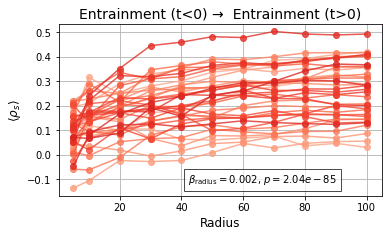

In [4]:
prem="Entrainment"
posm="Entrainment"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 396     Method:             REML       
No. Groups:       36      Scale:              0.0084     
Min. group size:  11      Log-Likelihood:     331.3482   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  -0.035     0.017  -2.041  0.041  -0.069  -0.001
Radius      0.004     0.000  26.924  0.000   0.004   0.004
Group Var   0.008     0.023                               



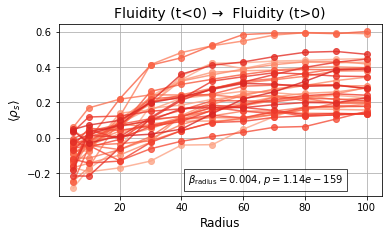

In [5]:
prem="Fluidity"
posm="Fluidity"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 396     Method:             REML       
No. Groups:       36      Scale:              0.0070     
Min. group size:  11      Log-Likelihood:     362.8316   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      0.033    0.017   1.956 0.050 -0.000  0.066
Radius        -0.004    0.000 -26.001 0.000 -0.004 -0.003
Group Var      0.008    0.026                            



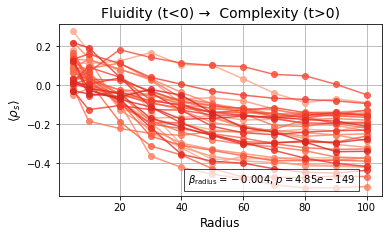

In [6]:
prem="Fluidity"
posm="Complexity"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 396     Method:             REML       
No. Groups:       36      Scale:              0.0026     
Min. group size:  11      Log-Likelihood:     538.3998   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.108    0.019  -5.824 0.000 -0.145 -0.072
Radius        -0.001    0.000 -15.786 0.000 -0.001 -0.001
Group Var      0.012    0.058                            



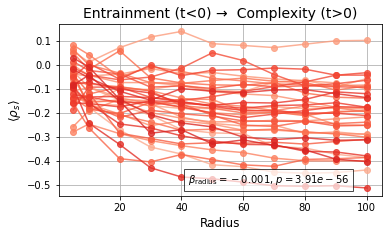

In [7]:
prem="Entrainment"
posm="Complexity"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 396     Method:             REML       
No. Groups:       36      Scale:              0.0031     
Min. group size:  11      Log-Likelihood:     507.2790   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.144    0.018  -7.883 0.000 -0.180 -0.108
Radius        -0.002    0.000 -18.713 0.000 -0.002 -0.002
Group Var      0.011    0.051                            



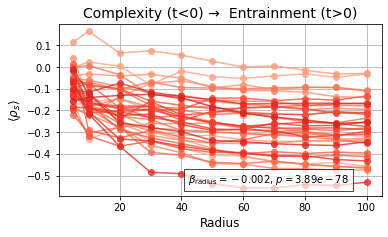

In [8]:
prem="Complexity"
posm="Entrainment"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


# Panel D

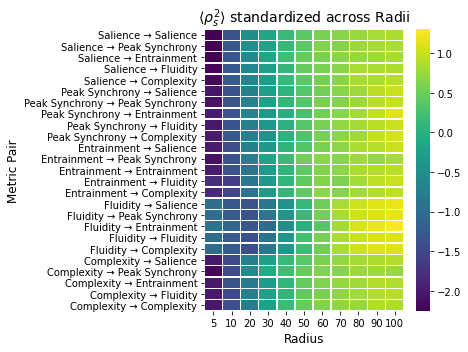

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(file_path)

# Define a mapping from M_i to actual metric names
metric_names = {
    "M_13": "Salience",
    "M_14": "Peak Synchrony",
    "M_76": "Entrainment",
    "M_29": "Fluidity",
    "M_119": "Complexity"
}

# Apply the mapping to replace metric codes with names
df["Pre_Metric"] = df["Pre_Metric"].map(metric_names)
df["Post_Metric"] = df["Post_Metric"].map(metric_names)

# Define metric order
ordered_metrics = ["Salience", "Peak Synchrony", "Entrainment", "Fluidity", "Complexity"]

# Ensure ordered categories
df["Pre_Metric"] = pd.Categorical(df["Pre_Metric"], categories=ordered_metrics, ordered=True)
df["Post_Metric"] = pd.Categorical(df["Post_Metric"], categories=ordered_metrics, ordered=True)

# Compute explained variance (rho²) instead of correlation (rho)
df["Explained_Variance"] = df["Correlation"] ** 2

# Compute mean explained variance
df_summary = df.groupby(["Pre_Metric", "Post_Metric", "Radius"])["Explained_Variance"].mean().reset_index()

# Create Metric Pair column
df_summary["Metric_Pair"] = df_summary["Pre_Metric"].astype(str) + " → " + df_summary["Post_Metric"].astype(str)

# Pivot table for heatmap format
heatmap_data = df_summary.pivot(index="Metric_Pair", columns="Radius", values="Explained_Variance")

# Ensure correct order
heatmap_data = heatmap_data.reindex(index=[f"{pre} → {post}" for pre in ordered_metrics for post in ordered_metrics])

# Z-score standardization across each row (i.e., across radii)
heatmap_data_standardized = heatmap_data.sub(heatmap_data.mean(axis=1), axis=0)
heatmap_data_standardized = heatmap_data_standardized.div(heatmap_data.std(axis=1), axis=0)

# Plot the heatmap (without annotations)
plt.figure(figsize=(6.5, 5))
sns.heatmap(heatmap_data_standardized, cmap="viridis", linewidths=0.5, cbar_kws={'label': r''})

# Labels and title
plt.xlabel("Radius", fontsize=12)
plt.ylabel("Metric Pair", fontsize=12)
plt.title(r"$\langle\rho_s^2 \rangle $ standardized across Radii", fontsize=14)

plt.tight_layout()
plt.show()


In [10]:
heatmap_data

Radius,5,10,20,30,40,50,60,70,80,90,100
Metric_Pair,,,,,,,,,,,
Salience → Salience,0.108896,0.158522,0.201166,0.220582,0.237063,0.250579,0.260333,0.265339,0.270048,0.275020,0.276169
Salience → Peak Synchrony,0.082297,0.110749,0.132796,0.142640,0.152335,0.159755,0.166578,0.167186,0.170858,0.172824,0.173491
Salience → Entrainment,0.060724,0.081667,0.097655,0.106699,0.114960,0.120764,0.123117,0.124887,0.126376,0.127050,0.128728
Salience → Fluidity,0.059690,0.084899,0.103052,0.112868,0.123294,0.132617,0.136126,0.138760,0.143379,0.143963,0.144193
Salience → Complexity,0.057595,0.079488,0.094208,0.102682,0.112689,0.119324,0.122479,0.125289,0.129460,0.129852,0.131016
Peak Synchrony → Salience,0.092770,0.134631,0.171513,0.197253,0.216133,0.233541,0.245173,0.252157,0.258861,0.268105,0.273046
Peak Synchrony → Peak Synchrony,0.072752,0.099296,0.122367,0.139791,0.152113,0.161266,0.169500,0.170791,0.176327,0.181462,0.183945
Peak Synchrony → Entrainment,0.054381,0.068902,0.083598,0.091253,0.098724,0.105531,0.111555,0.114587,0.117664,0.121390,0.125240
Peak Synchrony → Fluidity,0.052031,0.070799,0.085931,0.095242,0.105563,0.114233,0.120324,0.123808,0.126560,0.129031,0.131117
